
# **Jobsheet** 11


## **Praktikum 1**

## **Langkah 1- Import Library**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## **Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

### **Langkah 2.1. Pra Pengolahan Data Training**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MachineLearning/js11/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### **Langkah 2.2. Pra Pengolahan Data Testing**

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MachineLearning/js11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## **Langkah 3 - Pembuatan Model CNN**

### **Langkah 3.1.  - Inisiasi Model CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

### **Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### **Langkah 3.3 - Pembuatan Layer Pooling 1**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### **Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### **Langkah 3.5 - Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### **Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### **Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Langkah 3.8 - Compile Model CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 1696s 7s/step - loss: 0.6595 - accuracy: 0.6045 - val_loss: 0.6170 - val_accuracy: 0.6650
Epoch 2/25
250/250 [==============================] - 36s 145ms/step - loss: 0.5979 - accuracy: 0.6812 - val_loss: 0.5797 - val_accuracy: 0.7060
Epoch 3/25
250/250 [==============================] - 37s 148ms/step - loss: 0.5541 - accuracy: 0.7110 - val_loss: 0.5956 - val_accuracy: 0.6910
Epoch 4/25
250/250 [==============================] - 37s 148ms/step - loss: 0.5233 - accuracy: 0.7365 - val_loss: 0.4957 - val_accuracy: 0.7705
Epoch 5/25
250/250 [==============================] - 37s 146ms/step - loss: 0.4895 - accuracy: 0.7598 - val_loss: 0.5135 - val_accuracy: 0.7585
Epoch 6/25
250/250 [==============================] - 37s 150ms/step - loss: 0.4825 - accuracy: 0.7655 - val_loss: 0.4612 - val_accuracy: 0.7905
Epoch 7/25
250/250 [==============================] - 37s 147ms/step - loss: 0.4608 - accuracy: 0.7757 - val_loss: 0.4665 - val_acc

## **Langkah 5 - Prediksi dengan 1 Citra**

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/MachineLearning/js11/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 157ms/step


# **Praktikum 2**

**Desclaimer:** Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn

## **Deskripsi**


Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

## **Langkah 1 - Load Library**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## **Langkah 2 - Unduh Dataset CIFAR**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


## **Langkah 3 - Verifikasi Data**

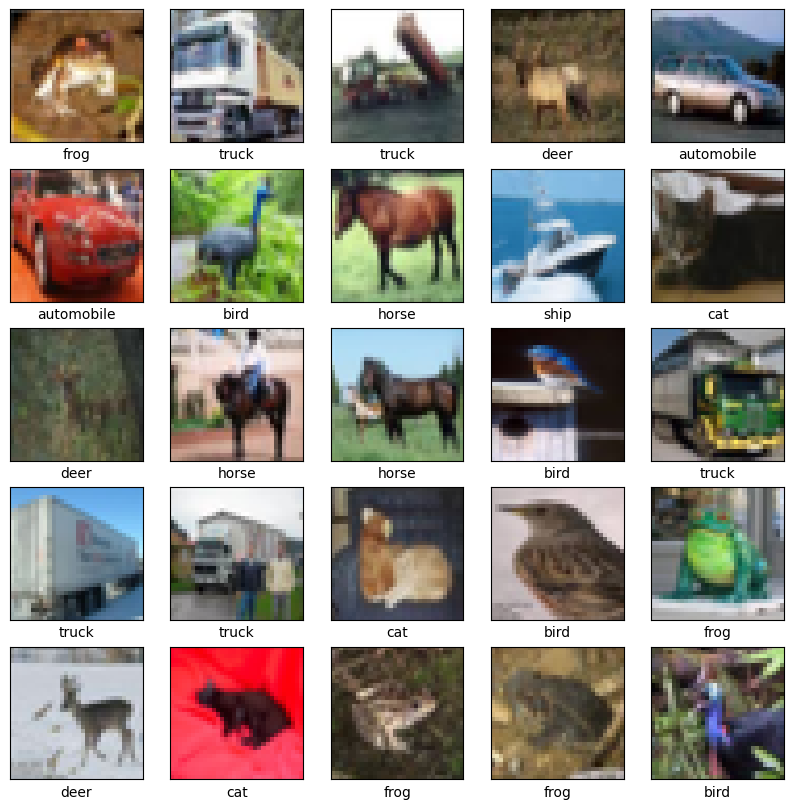

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## **Langkah 4 - Buat Model CNN**

### **Langkah 4.1. - Buat Layer Konvolusi**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### **Langkah 4.2. - Cek Arsitektur Konvolusi**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

### **Langkah 4.3. - Tambahkan Layer Fully Connected**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### **Langkah 4.4. - Cek Arsitektur Model CNN**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

### **Langkah 4.5. - Compile Model CNN**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Langkah 5 - Fit Model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5137 - accuracy: 0.4475 - val_loss: 1.2263 - val_accuracy: 0.5673
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1358 - accuracy: 0.6005 - val_loss: 1.0734 - val_accuracy: 0.6188
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9889 - accuracy: 0.6530 - val_loss: 1.0109 - val_accuracy: 0.6527
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8870 - accuracy: 0.6903 - val_loss: 0.9148 - val_accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8127 - accuracy: 0.7160 - val_loss: 0.9128 - val_accuracy: 0.6859
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7560 - accuracy: 0.7348 - val_loss: 0.8749 - val_accuracy: 0.7000
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7045 - accuracy: 0.7543 - val_loss: 0.8538 - val_accuracy

## **Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8707 - accuracy: 0.7108 - 663ms/epoch - 2ms/step


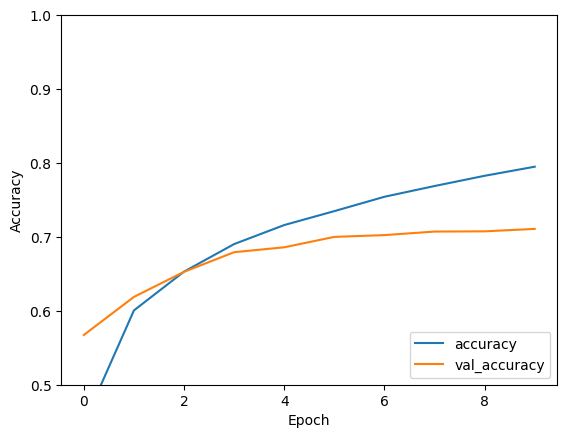

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## **Langkah 7 - Cetak Hasil Akurasi**

In [ ]:
print(test_acc)

0.7107999920845032


# **Tugas**

Buatlah model CNN untuk klasifikasi dataset MNIST

## **1. Import Library**

In [ ]:
# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

## **2. Persiapan Data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## **3. Model Parameter**

In [ ]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

## **4. Membuat Model CNN**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

## **5. Compile Model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## **6. Model Summary**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

## **7. Model Fitting**

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_data=(X_val, y_val))

Epoch 1/10
329/329 - 5s - loss: 0.3634 - accuracy: 0.8885 - val_loss: 0.0872 - val_accuracy: 0.9743 - 5s/epoch - 16ms/step
Epoch 2/10
329/329 - 2s - loss: 0.0997 - accuracy: 0.9705 - val_loss: 0.0639 - val_accuracy: 0.9807 - 2s/epoch - 6ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0718 - accuracy: 0.9787 - val_loss: 0.0536 - val_accuracy: 0.9846 - 2s/epoch - 5ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0468 - val_accuracy: 0.9853 - 2s/epoch - 5ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0456 - val_accuracy: 0.9863 - 2s/epoch - 5ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0420 - val_accuracy: 0.9880 - 2s/epoch - 6ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0429 - val_accuracy: 0.9877 - 2s/epoch - 6ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0370 - val_accuracy: 0.9897 - 2s/epoch - 6ms/step
Epoch 9/10
329/329 - 2s

## **8. Mmebuat Plot Accuracy dan Loss**

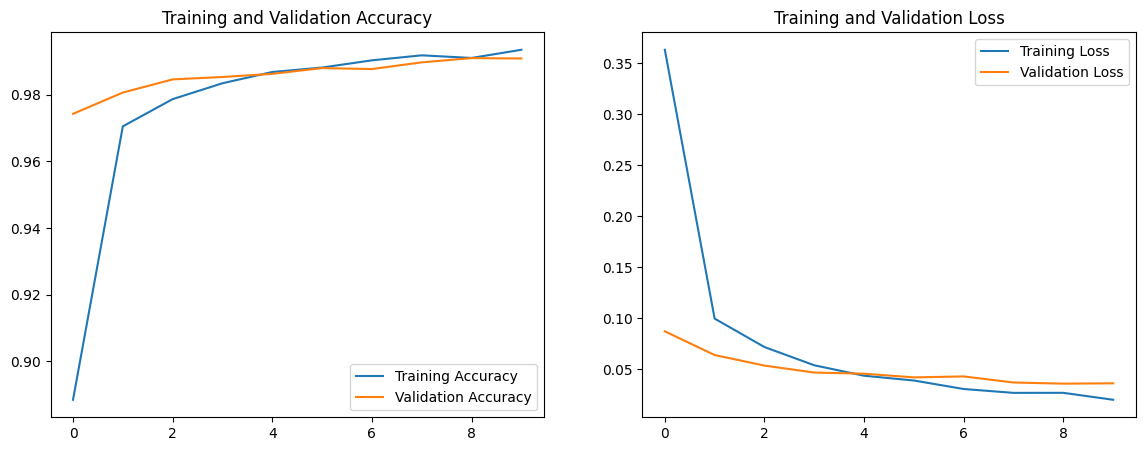

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

## **9. Evaluasi**

In [ ]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val, verbose=False)

[0.03618111088871956, 0.9908888936042786]

In [ ]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

563/563 [==============================] - 2s 3ms/step
[4.7941055e-14 1.3973676e-09 5.9117108e-12 4.7725786e-12 8.8794090e-11
 1.6087189e-13 2.6790049e-18 1.0000000e+00 1.7496794e-12 1.9563831e-10]
7


In [ ]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1805
           1       0.99      1.00      1.00      1994
           2       0.99      0.99      0.99      1759
           3       1.00      0.99      0.99      1846
           4       0.99      1.00      0.99      1726
           5       0.98      0.99      0.99      1653
           6       0.99      1.00      1.00      1787
           7       0.99      0.99      0.99      1937
           8       0.99      0.98      0.99      1730
           9       0.99      0.98      0.99      1763

    accuracy                           0.99     18000
   macro avg       0.99      0.99      0.99     18000
weighted avg       0.99      0.99      0.99     18000



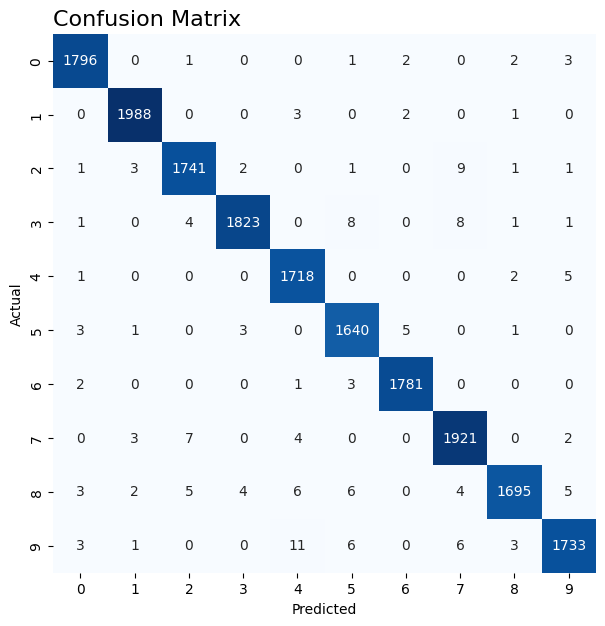

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

## **10. Prediksi**

In [ ]:
# Predicted values
y_pred_enc = model.predict(test_images)

# Decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 1s 2ms/step
[8.4227564e-12 5.4602790e-08 2.9731163e-08 3.9360559e-09 2.4820737e-10
 7.6063947e-12 6.1115942e-16 9.9999988e-01 5.4435807e-11 6.2228800e-09]
7


<ipython-input-41-a20e1707d1fb>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


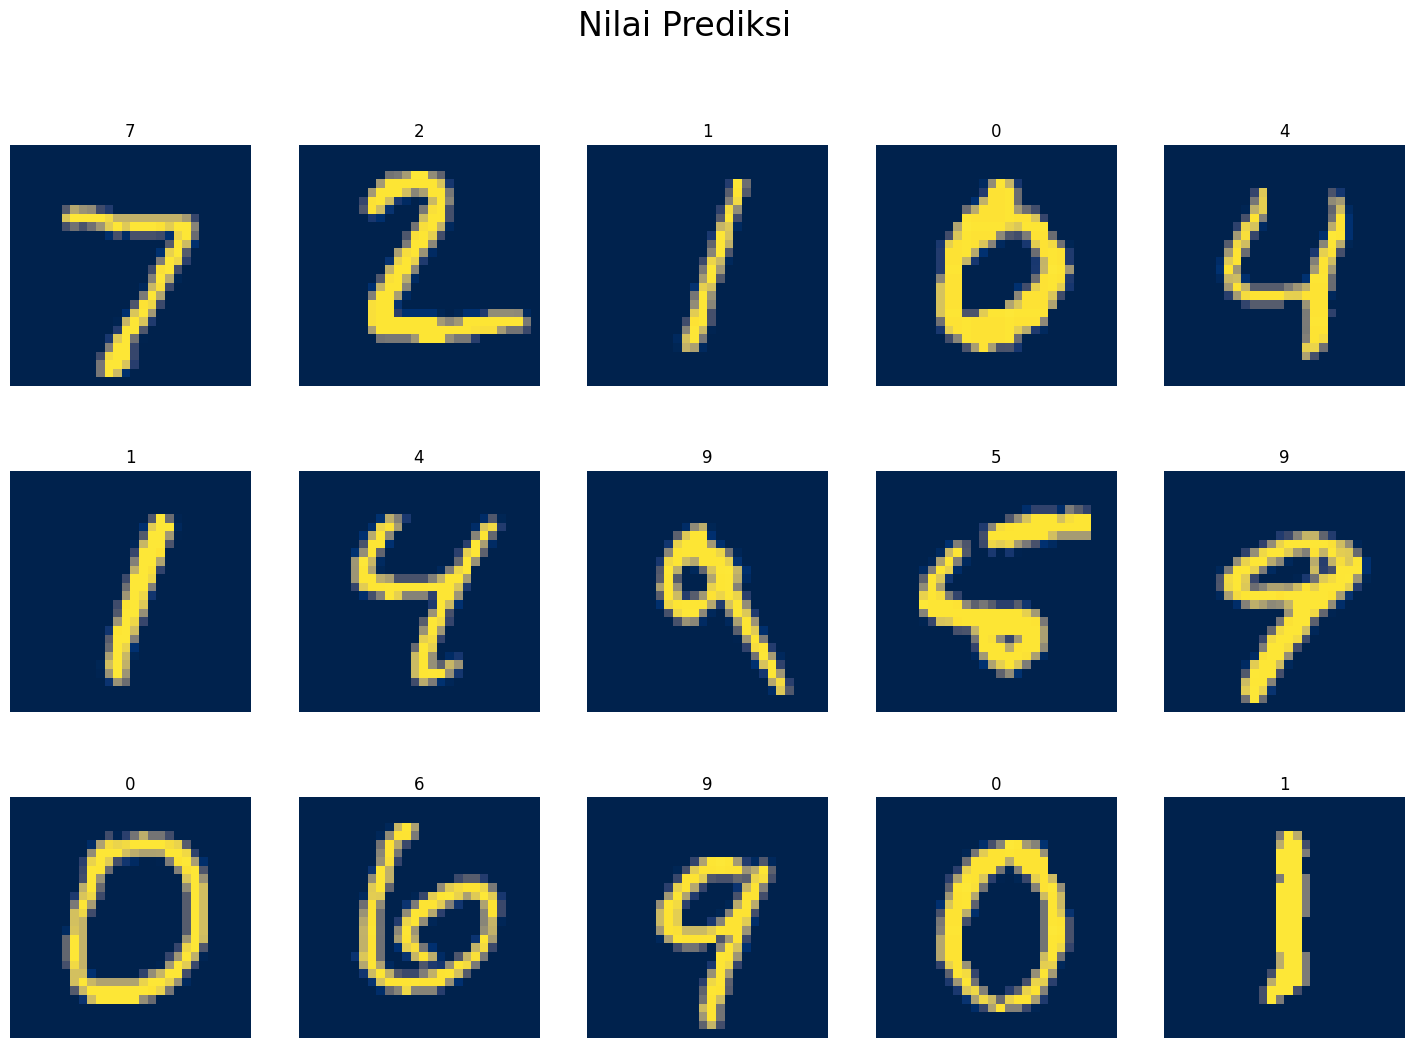

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Nilai Prediksi', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')